In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

Importing datasets manually

In [21]:
df_red = pd.read_csv('../winequality-red.csv', sep=';')

df_white = pd.read_csv('../winequality-white.csv', sep=';')

I add a color column to the datasets

In [22]:
df_red['color'] = 0    # per red
df_white['color'] = 1  # per white

df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


i'm applying oversampling to the red dataset so it does not have a lot less values than white

In [23]:

X_red = df_red.drop(columns='quality')
y_red = df_red['quality']

smote = SMOTE(random_state=42)
X_red_resampled, y_red_resampled = smote.fit_resample(X_red, y_red)

I concatenate the red and white datasets to have a single one

In [24]:
red_wine_resampled = pd.concat([
    pd.DataFrame(X_red_resampled, columns=X_red.columns),
    pd.Series(y_red_resampled, name='quality')
], axis=1)

data = pd.concat([red_wine_resampled, df_white], ignore_index=True)

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8979,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,6
8980,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,5
8981,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,6
8982,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,7


## Regrouping the target classes

3--4 $\rightarrow$ 1;   
5 $\rightarrow$ 2;  
6 $\rightarrow$ 3;  
7--8--9 $\rightarrow$ 4;    



In [25]:
data['quality'] = data['quality'].replace({
    3: 1, 4: 1,
    5: 2,
    6: 3,
    7: 4, 8: 4, 9: 4
})


In [26]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8979,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,3
8980,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,2
8981,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,3
8982,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,4


## Expolaratory Data analysis

We start with a pie chart to look at the proportion of quality levels

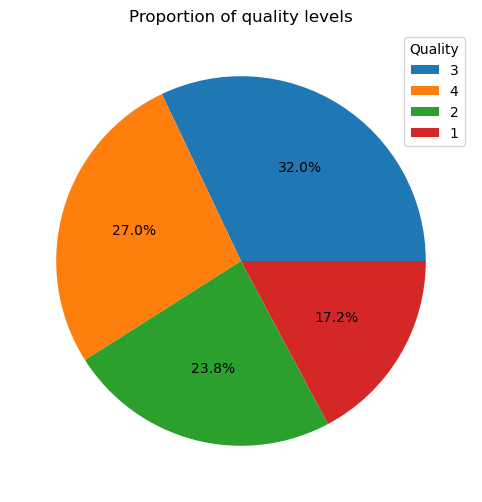

In [27]:
y = data['quality']
count = y.value_counts()
plt.figure(figsize=(10, 6))
plt.pie(count, labels=None, autopct='%1.1f%%')
plt.title('Proportion of quality levels')
plt.legend(labels=count.index, title="Quality", loc="best")
plt.show()

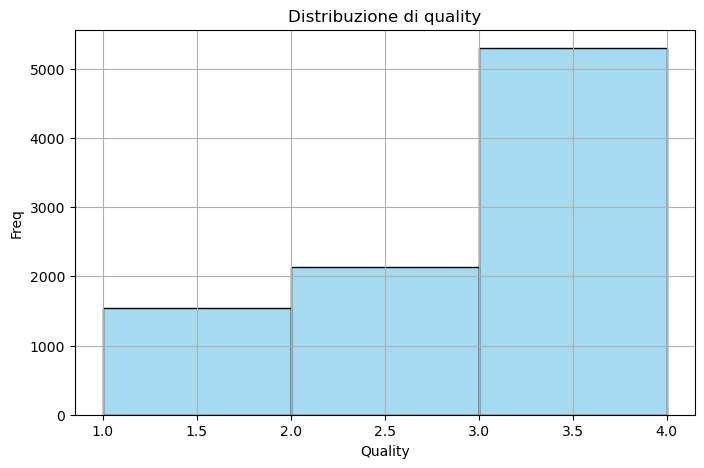

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(data['quality'], bins=range(data['quality'].min(), data['quality'].max()+1), color='skyblue')
plt.title("Distribuzione di quality")
plt.xlabel("Quality")
plt.ylabel("Freq")
plt.grid(True)
plt.show()

It is a good distribution, thus i'll try first without oversampling

In [30]:
X = data.drop(columns='quality')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, shuffle= True)

X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
87,7.700000,0.490000,0.260000,1.900000,0.062000,9.000000,31.000000,0.996600,3.390000,0.640000,9.600000,0
3393,8.263077,0.291538,0.371538,2.436923,0.076154,16.630770,44.476922,0.994994,3.343231,0.773692,12.056923,0
2884,6.315204,0.374654,0.302926,11.494714,0.059122,6.656676,108.009265,0.995935,3.286866,0.563940,11.197929,0
401,7.700000,0.260000,0.300000,1.700000,0.059000,20.000000,38.000000,0.994900,3.290000,0.470000,10.800000,0
2465,9.160862,0.516777,0.988028,3.381582,0.597637,31.769774,69.345339,0.999545,2.753353,1.970071,9.404605,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,7.100000,0.300000,0.490000,1.600000,0.045000,31.000000,100.000000,0.994200,3.400000,0.590000,10.200000,1
5191,5.500000,0.320000,0.450000,4.900000,0.028000,25.000000,191.000000,0.992200,3.510000,0.490000,11.500000,1
5390,8.000000,0.590000,0.710000,17.350000,0.038000,61.000000,228.000000,1.000000,2.950000,0.750000,9.300000,1
860,7.200000,0.620000,0.060000,2.700000,0.077000,15.000000,85.000000,0.997460,3.510000,0.540000,9.500000,0


# EXPERIMENTS
We start by looking at the best performing models w/o optmization.
First we load the models

In [31]:
models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'MLP': MLPClassifier(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier()
}

We then scale the sets

In [32]:
cols_to_scale = X.columns.difference(['color'])

scaler = StandardScaler()
scaler.fit(X_train[cols_to_scale])

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

And now we train all the models to select the best permorming ones.

In [33]:
best_model = None
best_accuracy = 0
results = {}
best_models ={}

for name, model in models.items():
    if name == 'Decision Tree':
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

    if acc >= 0.67:
        best_models[name] = model


    if acc > best_accuracy:
        best_accuracy = acc
        best_model = name

print(f"best model: {best_model} with accuracy {best_accuracy:.4f}")

SVM Accuracy: 0.6550
Logistic Regression Accuracy: 0.6055
MLP Accuracy: 0.6828
Decision Tree Accuracy: 0.7045
best model: Decision Tree with accuracy 0.7045


In [34]:
best_models

{'MLP': MLPClassifier(max_iter=1000),
 'Decision Tree': DecisionTreeClassifier()}

Since we only found accuracy >= 0.6 for mlp and decision trees we are going to grid search only on those

In [ ]:
param_grids = {
    'MLP': {
        'classifier__hidden_layer_sizes': [(50,), (100,), (100, 50)],
        'classifier__alpha': [0.0001, 0.001]
    },
    'Decision Tree': {
        'classifier__max_depth': [5, 10, None],
        'classifier__min_samples_split': [2, 5, 10]
    }
}

Here we train using gridsearch (and also RFE for decision trees)

In [ ]:
results = {}

for name, model in best_models.items():
    print(f"CHECK FOR: {name}")

    if name == 'MLP':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])
        grid = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train, y_train)

        y_pred = grid.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        results[name] = (acc, grid.best_params_)
        print(f"Best Score: {grid.best_score_}")
        print(f"Best Params: {grid.best_params_}")

    else:

        selector = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring='accuracy')
        X_train_sel = selector.fit_transform(X_train, y_train)
        X_test_sel = selector.transform(X_test)

        print(f"Selected features: {selector.n_features_}")

        pipeline = Pipeline([
            ('classifier', model)
        ])
        grid = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid.fit(X_train_sel, y_train)

        y_pred = grid.predict(X_test_sel)
        acc = accuracy_score(y_test, y_pred) 

        results[name] = (acc, grid.best_params_)
        print(f"Best Score: {grid.best_score_}")
        print(f"Best Params: {grid.best_params_}")

best_model = max(results, key=lambda k: results[k][0])
print(f"Best model: {best_model} with score {results[best_model][0]}")


CHECK FOR: MLP
Best Score: 0.7083657325811095
Best Params: {'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (100, 50)}
CHECK FOR: Decision Tree
Selected features: 11
Best Score: 0.6809540816277151
Best Params: {'classifier__max_depth': None, 'classifier__min_samples_split': 2}
Best model: MLP with score 0.7256538675570395
